# Exploratory Data Analysis on Medical Appointment No Shows
## Introduction
Why do patients miss their scheduled medical appointments? This project looks at the variables surrounding patients who have made appointments and attempts at gaining insights as to why some missed their appointment in a hospital in Brazil.


| Attributes | Description|
| ----- | ----- |
| `PatientID` | Identification of a patient |
| `AppointmentID` | Identification of each appointment |
| `Gender` | Male or Female |
| `ScheduledDay` | The day someone called or registered the appointment (This is before the appointment) |
| `AppointmentDay` | The day of appointment  when they have to visit the doctor.|
| `Age` | Age of the patient |
| `Neighborhood` | Where the appointment takes place |
| `Scholarship` | If the patient is a partaker of the [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia), a social welfare program of the Government of Brazil. |
| `Hypertension` | Whether the patient has hypertension. |
| `Diabetes` | Whether the patient has diabetes |
| `Alcoholism` | Whether the patient is an alcoholic |
| `Handicap` | Whether the patient is handicapped |
| `SMS_received` | Whether 1 or more messages were sent to the patient |
| `No_show` | Did the patient show up? |

`No_show` is our variable of interest. 

**Questions of Interest:**
1. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
2. What day of the week to do most people miss their appointment? Consequently, what day do most people show up?
3. What is the general age of persons who tend to miss their appointments?
2. Do SMS reminders affect the average attendance?
3. What neighborhood is famous for missing their appointments?

## Data Wrangling

### Loading Data
Importing libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
# let's see how the data is
df.head(15)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598510e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336880e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449830e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639470e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812460e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [3]:
df.shape

(110527, 14)

The data is made up of 14 variables and has 110527 entries.

### Assessing Data
Let's inspect the data to see the changes that can be made.

In [4]:
df.describe()

,PatientID,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


* `PatientID` and `AppointmentID` won't be needed in this analysis.
* Data entry error in `Age`. Let's only deal with a range of 0 (babies) to 100yrs.
* `No_show` and `Gender` column is a binary data and can be mapped to 1's ('Yes' | 'Male') and 0's ('No' | 'Female').
* `Handicap` a supposed binary column has a max value of 4. Drop all rows with values other than 0 and 1.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientID       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No_show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


* This is a fairly clean data with no Nan value. That's great!
* `ScheduledDay` and `AppointmentDay` need to be converted into datetime datatypes.

In [6]:
# making sure that there are only 2 categories in `gender`
df.Gender.unique()

array(['F', 'M'], dtype=object)

In [7]:
# making sure there's no data entry error in `No_show`
df.No_show.unique()

array(['No', 'Yes'], dtype=object)

Any duplicated rows?

In [8]:
df.duplicated().sum()

0

### Cleaning Data
Let's act on the issues that we found.

* Dropping `PatientID` and `AppointmentID` because they're randomized ID numbers and won't affect this analysis.

In [9]:
df.drop(['PatientID','AppointmentID'],axis=1, inplace=True)

# check
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS_received', 'No_show'],
      dtype='object')

* Fixing data entry error in `Age`

In [10]:
df.query("Age >= 0", inplace=True)
df.query("Age <= 100", inplace=True)
df.describe()['Age']

count    110519.000000
mean         37.084519
std          23.103165
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         100.000000
Name: Age, dtype: float64

Fix `Age` datatype to `int`

In [11]:
df['Age'] = df['Age'].astype(int)
df['Age'].dtype

dtype('int32')

* `No_show` and `Gender` column is a binary data and can be mapped to 1's ('Yes' | 'Male') and 0's ('No' | 'Female').

In [12]:
noShow_vals = {'No':0, 'Yes':1}
gender_vals = {'F':0, 'M':1}

# creating new columns for mapped values
df['No_show_numeric'] = df.No_show.map(noShow_vals)
df['Gender_numeric'] = df.Gender.map(gender_vals)
df.head(15)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,No_show_numeric,Gender_numeric
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,0
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,1
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,0
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,0
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,0
5,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No,0,0
6,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1,0
7,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1,0
8,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No,0,0
9,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No,0,0


* Convert `ScheduledDay` and `AppointmentDay` to datetime type

In [13]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

* Let's add another column for time to appointment. This will help us get a view of the wait time in **days** for each appointment.

In [14]:
days = df['AppointmentDay'] - df['ScheduledDay']
# getting the day out of the timedelta64[ns] datatype
days = days.dt.days
df['timeToAppointment'] = days
df.head()


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,No_show_numeric,Gender_numeric,timeToAppointment
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,0,-1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,1,-1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,0,-1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,0,-1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,0,-1


Notice the negative days in the `timeToAppointment` column? Let's have a closer look at them to understand it.

In [15]:
df['timeToAppointment'].unique()

array([ -1,   1,   2,   0,   3,   8,  28,   9,  22,  10,  17,  16,  13,
        27,  23,  20,  14,  15,  21,  42,  29,  30,  41,  31,  55,  44,
        45,  38,  36,  37,  43,  49,  59,  51,  52,  64,  66,  90,  65,
        83,  77,  86, 114, 108,  62,  69,  71,  56,  57,  50,  58,  40,
        48,  72,  63,  19,  32,  33,   5,  34,  35,  11,  12,  39,  46,
         7,   4,   6,  24,  25,  47,  26,  18,  60,  54,  61, 175,  53,
        76,  68,  82,  75,  88,  80, 102,  78,  67,  74,  84, 111,  -2,
        79,  85,  97,  93, 141, 154, 161, 168, 103, 132, 124,  95,  87,
        89, 150, 125, 126, 110, 118,  73,  70,  81, 107, 109, 101, 121,
       100, 104,  91,  96,  92, 106,  94,  -7, 138, 131, 178, 116, 145,
       122], dtype=int64)

In [16]:
# let's look at the amount of -ve 'timeToAppointment' values we have
df.timeToAppointment.value_counts().sort_index().head(15)

-7         1
-2         4
-1     38560
 0      5213
 1      6724
 2      2735
 3      5290
 4      3277
 5      4037
 6      4906
 7      2332
 8      1605
 9      1391
 10      987
 11     1115
Name: timeToAppointment, dtype: int64

In [17]:
df.query("timeToAppointment in [-7,-2]")

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,No_show_numeric,Gender_numeric,timeToAppointment
27033,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,1,1,-2
55226,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,1,0,-2
64175,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,1,0,-2
71533,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,1,0,-7
72362,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes,1,1,-2


This looks like a case of data entry error. From the data above, these patients had an their appointments earlier than scheduled resulting the negative values in our `timeToAppointment` column. Data can't be found why this is so, so we'll exclude all negative values from our analysis.

In [18]:
df.query("timeToAppointment >= 0", inplace=True)
# check dataset
df.timeToAppointment.unique()

array([  1,   2,   0,   3,   8,  28,   9,  22,  10,  17,  16,  13,  27,
        23,  20,  14,  15,  21,  42,  29,  30,  41,  31,  55,  44,  45,
        38,  36,  37,  43,  49,  59,  51,  52,  64,  66,  90,  65,  83,
        77,  86, 114, 108,  62,  69,  71,  56,  57,  50,  58,  40,  48,
        72,  63,  19,  32,  33,   5,  34,  35,  11,  12,  39,  46,   7,
         4,   6,  24,  25,  47,  26,  18,  60,  54,  61, 175,  53,  76,
        68,  82,  75,  88,  80, 102,  78,  67,  74,  84, 111,  79,  85,
        97,  93, 141, 154, 161, 168, 103, 132, 124,  95,  87,  89, 150,
       125, 126, 110, 118,  73,  70,  81, 107, 109, 101, 121, 100, 104,
        91,  96,  92, 106,  94, 138, 131, 178, 116, 145, 122], dtype=int64)

In [19]:
# let's see our work so far
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71954 entries, 5 to 110526
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Gender             71954 non-null  object             
 1   ScheduledDay       71954 non-null  datetime64[ns, UTC]
 2   AppointmentDay     71954 non-null  datetime64[ns, UTC]
 3   Age                71954 non-null  int32              
 4   Neighbourhood      71954 non-null  object             
 5   Scholarship        71954 non-null  int64              
 6   Hypertension       71954 non-null  int64              
 7   Diabetes           71954 non-null  int64              
 8   Alcoholism         71954 non-null  int64              
 9   Handicap           71954 non-null  int64              
 10  SMS_received       71954 non-null  int64              
 11  No_show            71954 non-null  object             
 12  No_show_numeric    71954 non-null  int64     

* Drop all rows in `Handicap` with values other than 0 and 1.

In [20]:
# let's see what's in the column
df.Handicap.value_counts()

0    70650
1     1182
2      112
3        8
4        2
Name: Handicap, dtype: int64

In [21]:
# dropping all rows with values other than 0 and 1
df.query("Handicap <= 1", inplace=True)

In [22]:
# resetting the messed up index
df.reset_index(drop=True, inplace=True)

In [23]:
# check
df.Handicap.value_counts()

0    70650
1     1182
Name: Handicap, dtype: int64

In [24]:
df.shape

(71832, 15)

## Exploratory Analysis and Visualization
Let's have feel of what the data and it's underlying relationships look like. Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [25]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Let's look at the descriptive statistics of the numerical columns.

In [26]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show_numeric,Gender_numeric,timeToAppointment
count,71832.000000,71832.000000,71832.000000,71832.000000,71832.000000,71832.000000,71832.000000,71832.000000,71832.000000,71832.000000
mean,38.481359,0.092772,0.208486,0.074451,0.025267,0.016455,0.493290,0.285138,0.331830,14.645492
std,22.908609,0.290115,0.406229,0.262506,0.156937,0.127218,0.499958,0.451483,0.470874,16.496760
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
75%,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,21.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,178.000000


#### Age

We can see that the average age of patients from this dataset is 38 years and an average of 14days is spent waiting for one's appointment day. The rest of the data is binary in nature so we'll have to visualize it so as to understand it better.

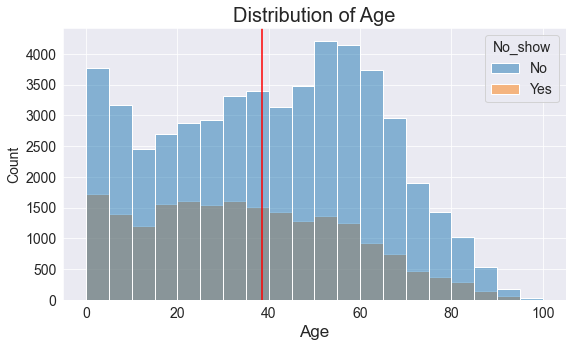

In [27]:
plt.title("Distribution of Age", fontsize=20)
plt.xlabel('Age', fontsize=17)
# vertical line showing mean
plt.axvline(x = df.Age.mean(), color = 'r')
sns.histplot(data=df, x="Age", hue="No_show", bins=20);

From the distribution, we can see 2 peaks. Further inspection shows that newborn babies and adults from ages 50 to 60 years are the patients with the highest appointments scheduled. It makes sense that newborn babies should have the higher appointments. Most parents will ensure that their babies have the needed vaccinations and other treatments are made available to them. We can also see that the mean age of patients is 38years.

#### Time to Appointment

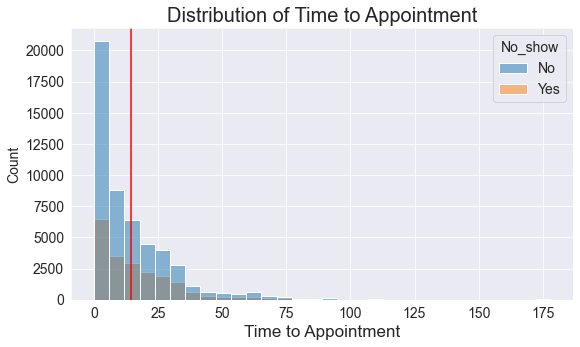

In [28]:
plt.title("Distribution of Time to Appointment", fontsize=20)
plt.xlabel('Time to Appointment', fontsize=17)
# vertical line showing mean
plt.axvline(x = df.timeToAppointment.mean(), color = 'r')
sns.histplot(data=df, x="timeToAppointment", hue="No_show", bins=30);

The distribution of the time to appointment is Exponential with most of data between 0 to 13 days.

#### Visualization of the binary columns 
`Scholarship`, `Hypertension`, `Diabetes`, `Alcoholism`, `Handicap`, `SMS_received`, `No_show_numeric` and `Gender_numeric` are the binary columns. We'll first visualize them with a countplot to see the distribution of our data.

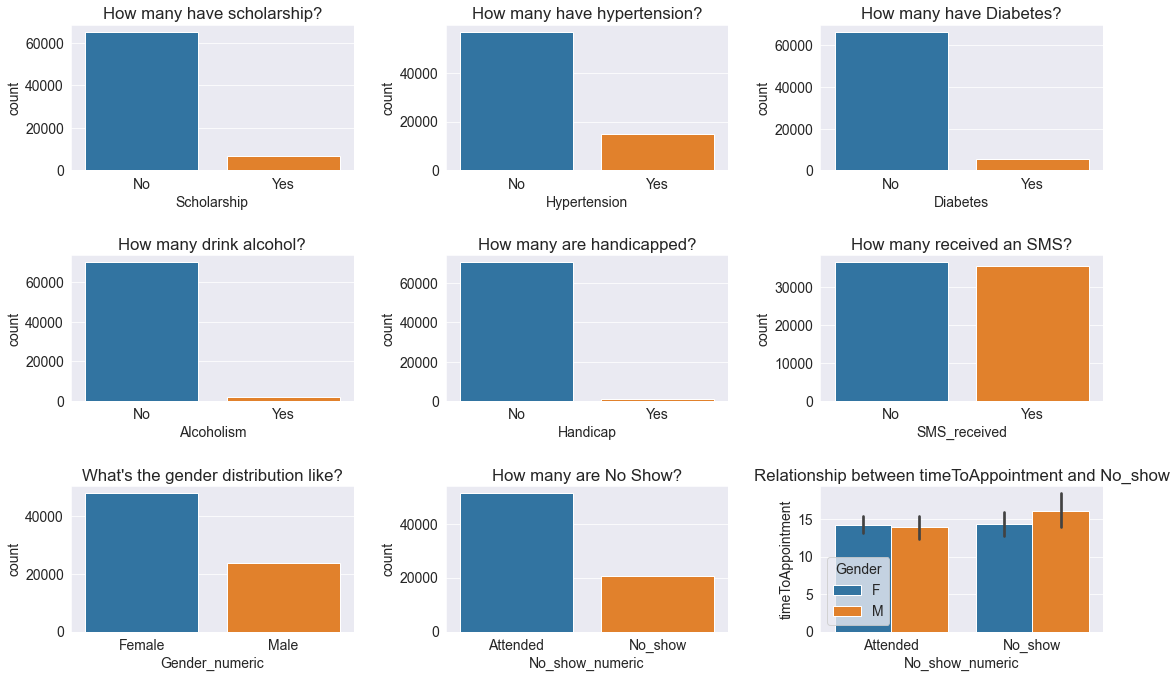

In [29]:
# we want to plot 8 figures at once. 3 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(16,10))

# visualizing `Scholarship`
axes[0,0].set_title("How many have scholarship?")
sns.countplot(x=df.Scholarship, ax=axes[0,0]);
axes[0,0].set_xticklabels(labels=['No','Yes']);

# visualizing `Hypertension`
axes[0,1].set_title("How many have hypertension?")
sns.countplot(x=df.Hypertension, ax=axes[0,1]);
axes[0,1].set_xticklabels(labels=['No','Yes']);

# visualizing `Diabetes`
axes[0,2].set_title("How many have Diabetes?")
sns.countplot(x=df.Diabetes, ax=axes[0,2]);
axes[0,2].set_xticklabels(labels=['No','Yes']);

# visualizing `Alcoholism`
axes[1,0].set_title("How many drink alcohol?")
sns.countplot(x=df.Alcoholism, ax=axes[1,0]);
axes[1,0].set_xticklabels(labels=['No','Yes']);

# visualizing `Handicap`
axes[1,1].set_title("How many are handicapped?")
sns.countplot(x=df.Handicap, ax=axes[1,1]);
axes[1,1].set_xticklabels(labels=['No','Yes']);

# Visualizing `SMS_received`
axes[1,2].set_title("How many received an SMS?")
sns.countplot(x=df.SMS_received, ax=axes[1,2]);
axes[1,2].set_xticklabels(labels=['No','Yes']);

# Visualizing `Gender_numeric`
axes[2,0].set_title("What's the gender distribution like?")
sns.countplot(x=df.Gender_numeric, ax=axes[2,0]);
axes[2,0].set_xticklabels(labels=['Female','Male']);

# Visualizing `No_show_numeric`
axes[2,1].set_title("How many are No Show?")
sns.countplot(x=df.No_show_numeric, ax=axes[2,1]);
axes[2,1].set_xticklabels(labels=['Attended','No_show']);

# Relationship between timeToAppointment and Age
axes[2,2].set_title("Relationship between timeToAppointment and No_show")
sns.barplot(x='No_show_numeric', y='timeToAppointment', data=df.sample(2000), hue='Gender');
axes[2,2].set_xticklabels(labels=['Attended','No_show']);

plt.tight_layout(pad=2)

A large number of patients in this dataset don't have any of the listed ailments and are non alcoholics. Most of the patients pay their medical bills themselves since a large number of them aren't on the Bolsa Família scholarship program. We can also see that most of the patients in this data are women as women generally take good care of their health than men do. Also while there's a similarity between the number of those who received an SMS and those who didn't, we can see that a majority of the people didn't show up.

## Asking and Answering Questions
Now, that we know how the data looks like, let's derive some insights from it. 

#### Q1: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

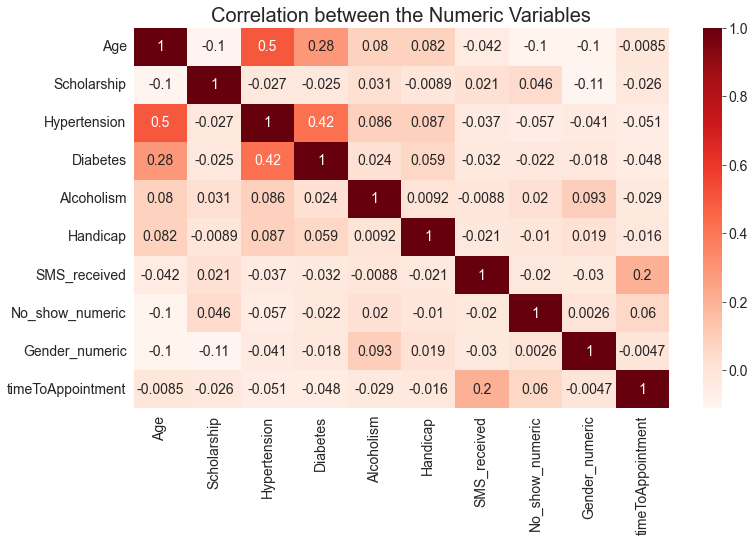

In [71]:
plt.figure(figsize=(12,7))
plt.title("Correlation between the Numeric Variables", fontsize=20)
sns.heatmap(df.corr(), cmap='Reds', annot=True);

So far, from our heatmap above, most of our predictor variables have a weak (~0) relationship with the target variable (`No_show_numeric`). So far `Scholarship`, `Alcoholism` and `timeToAppointment` seem the relatively highest correlation with the target variable, 0.045, 0.02 and 0.06 respectively.

#### Q2: What day of the week to do most people miss their appointment? Consequently, what day do most people show up?

In [72]:
df['Appointment_Weekday'] = df['AppointmentDay'].apply(lambda x: pd.Timestamp(x).day_name())
df['Scheduled_Weekday'] = df['ScheduledDay'].apply(lambda x: pd.Timestamp(x).day_name())

In [84]:
df['Appointment_Weekday'].unique()

array(['Friday', 'Tuesday', 'Monday', 'Thursday', 'Wednesday', 'Saturday'],
      dtype=object)

In [85]:
df['Scheduled_Weekday'].unique()

array(['Wednesday', 'Tuesday', 'Thursday', 'Monday', 'Friday', 'Saturday'],
      dtype=object)

Let's change the datatype of `Appointment_Weekday` and `Scheduled_Weekday` to `category` so as to maintain order. Notice that there's no data for Sunday. The hospital probably doesn't take appointments or registrations on Sundays.

In [86]:
from pandas.api.types import CategoricalDtype

cat_dtype = CategoricalDtype(categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], ordered=True)

df['Appointment_Weekday'] = df.Appointment_Weekday.astype(cat_dtype)
df['Scheduled_Weekday'] = df.Scheduled_Weekday.astype(cat_dtype)

In [92]:
# check
df['Appointment_Weekday'].unique()

['Friday', 'Tuesday', 'Monday', 'Thursday', 'Wednesday', 'Saturday']
Categories (6, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday']

In [93]:
df['Scheduled_Weekday'].unique()

['Wednesday', 'Tuesday', 'Thursday', 'Monday', 'Friday', 'Saturday']
Categories (6, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday']

Let's look at the subset of the data for those who missed their appointment.

In [94]:
df_miss = df.query("No_show == 'Yes'")

In [95]:
df_miss.shape

(20482, 17)

Since the count for all the columns will be same, we can look at any

In [99]:
dataMiss = df_miss.groupby("Appointment_Weekday").count()['No_show']
dataMiss

Appointment_Weekday
Monday       4395
Tuesday      4707
Wednesday    4618
Thursday     3083
Friday       3670
Saturday        9
Name: No_show, dtype: int64

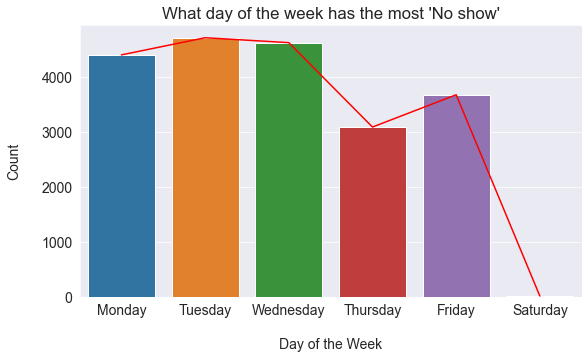

In [122]:
plt.title("What day of the week has the most 'No show'")
plt.plot(dataMiss.values, color="r")
sns.barplot(x=dataMiss.index, y=dataMiss.values)
plt.xlabel('\nDay of the Week')
plt.ylabel("Count\n");

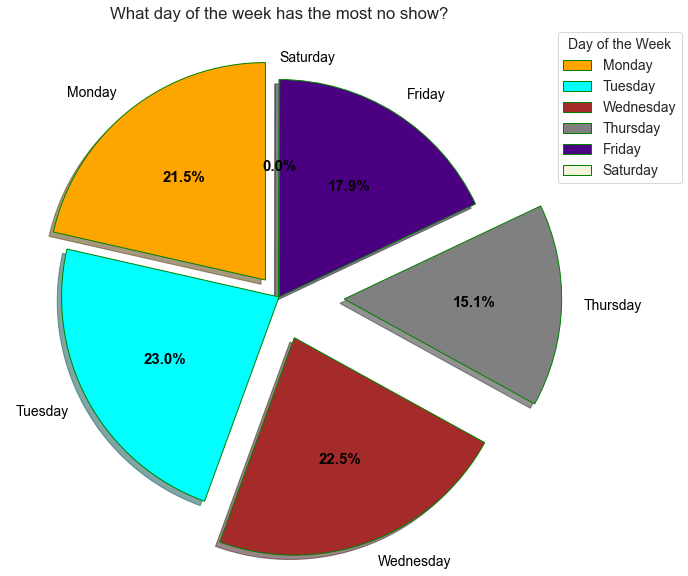

In [149]:
# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0)

# Creating color parameters
colors = ( "orange", "cyan", "brown",
		"grey", "indigo", "beige")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating autopct arguments
def func(pct, allvalues):
	absolute = int(pct / 100.*np.sum(allvalues))
	return "{:.1f}%".format(pct)

# Creating plot
fig, ax = plt.subplots(figsize =(20, 10))
wedges, texts, autotexts = ax.pie(dataMiss.values,
                                  autopct = lambda pct: func(pct, dataMiss.values),
                                  explode = explode,
                                  labels = dataMiss.index,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

# Adding legend
ax.legend(wedges, dataMiss.index,
          title ="Day of the Week",
          loc ="upper left",
          bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 15, weight ="bold")
ax.set_title("What day of the week has the most no show?", loc="center")

# show plot
plt.show()


From the plots above, Tuesday has the highest percentage (23.0%) of missed appointments followed by Wednesday (22.5%) then Monday (21.5%). This is probably due to the fact that these are the busiest days of the week. Hence people tend to be preoccupied leading to a no-show. Saturday recorded an approximately 0.0% no_show. Only 9 people from this dataset missed their appointments.

Let's look at the subset of the data for those who attended their appointment.

In [150]:
df_attend = df.query("No_show == 'No'")

In [151]:
df_attend.shape

(51350, 17)

In [152]:
dataAttend = df_attend.groupby("Appointment_Weekday").count()['No_show']
dataAttend

Appointment_Weekday
Monday       10162
Tuesday      11728
Wednesday    12395
Thursday      8218
Friday        8825
Saturday        22
Name: No_show, dtype: int64

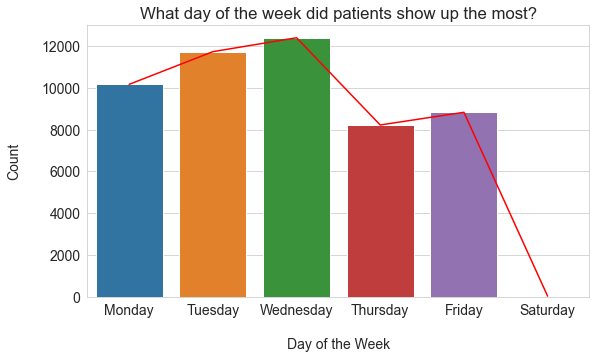

In [160]:
plt.title("What day of the week did patients show up the most?")
plt.plot(dataAttend.values, color="red")
sns.barplot(x=dataAttend.index, y=dataAttend.values)
plt.xlabel('\nDay of the Week')
plt.ylabel("Count\n");

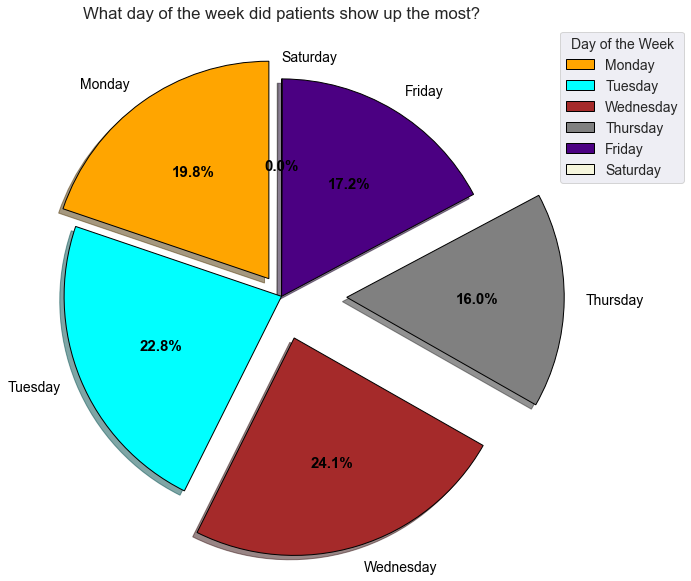

In [223]:
# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0)

# Creating color parameters
colors = ( "orange", "cyan", "brown",
		"grey", "indigo", "beige")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "black" }

# Creating autopct arguments
def func(pct):
	return "{:.1f}%".format(pct)

# Creating plot
fig, ax = plt.subplots(figsize =(20, 10))
wedges, texts, autotexts = ax.pie(dataAttend.values,
                                  autopct = lambda pct: func(pct, dataAttend.values),
                                  explode = explode,
                                  labels = dataAttend.index,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

# Adding legend
ax.legend(wedges, dataAttend.index,
          title ="Day of the Week",
          loc ="upper left",
          bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 15, weight ="bold")
ax.set_title("What day of the week did patients show up the most?", loc="center")

# show plot
plt.show()

Here, Wednesday has the highest percentage (24.1%) of patients showing up for their appointments. Next is Tuesday with 22.8% then Monday with 19.8%. Notice that Saturday also has the lowest percentage with only 22 patients showing up in this dataset. Looks like the first 3 days of the week are the busiest and also the days that are most likely to get the highest no shows.

#### Q3: What is the general age of persons who tend to miss their appointments?

Let's have a look at the age distribution of the 'No-shows'

Mean age: 34.79yrs


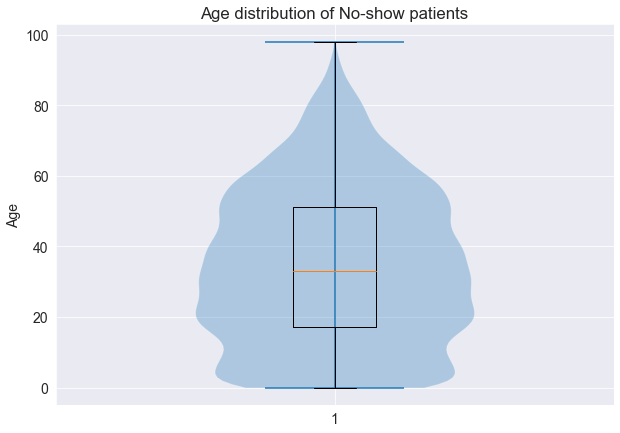

In [192]:
# print mean
print("Mean age: {:.2f}yrs".format(df_miss.Age.mean()))

# reseting set style
sns.set_style('darkgrid')
plt.figure(figsize=(10,7))

plt.violinplot(df_miss['Age'])
plt.boxplot(x=df_miss['Age'])
plt.ylabel('Age')
plt.title("Age distribution of No-show patients");

From the plot above, we can see that majority of patients who are no-shows are between the age of 0 to 60 with the mean age being 34.8years. It seems that older patients tend to attend their appointments. There are no outliers in this variable.

Let's have a look at the age distribution of the 'No-shows'

Mean age: 39.95yrs


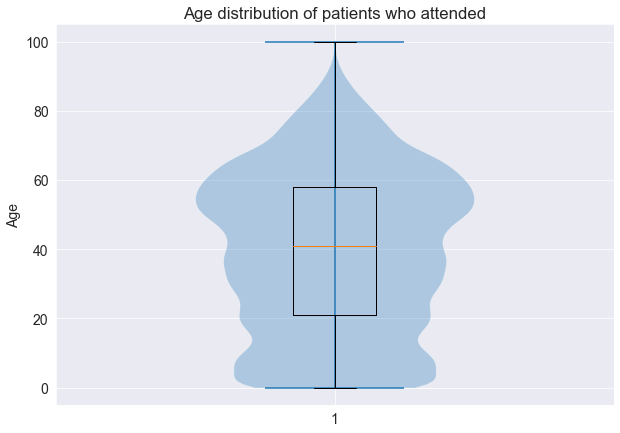

In [193]:
# print mean
print("Mean age: {:.2f}yrs".format(df_attend.Age.mean()))

# reseting set style
sns.set_style('darkgrid')
plt.figure(figsize=(10,7))

plt.violinplot(df_attend['Age'])
plt.boxplot(x=df_attend['Age'])
plt.ylabel('Age')
plt.title("Age distribution of patients who attended");

The peak age in this distribution is around 53yrs with the mean age of patients who showed up to their appointments being 39.95 yrs. There are no outliers in this variable.

#### Q4: Do SMS reminders affect the average attendance?

Let's see how the column is distributed.

In [211]:
# percentage of distribution of the `SMS_received` column
df.SMS_received.value_counts() * 100 / df.SMS_received.count()

0    50.67101
1    49.32899
Name: SMS_received, dtype: float64

The distribution between patients who received an SMS reminder and those who didn't is roughly similar.

Let's split the subset the data based on patients who didn't receive SMS reminders.

In [234]:
df_noSMS = df.query('SMS_received == 0')
df_noSMS.shape

(36398, 17)

In [235]:
plotData_noSMS =  df_noSMS.No_show_numeric.value_counts()
plotData_noSMS

0    25691
1    10707
Name: No_show_numeric, dtype: int64

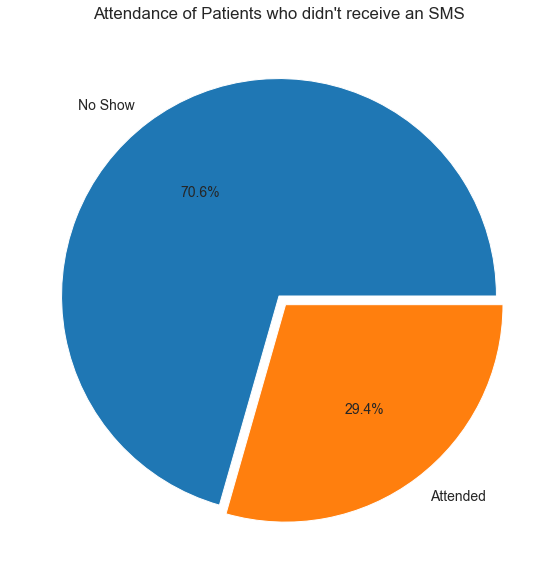

In [240]:
plt.figure(figsize=(20,10))

# Creating autopct arguments
def func(pct):
	return "{:.1f}%".format(pct)

# main plot function
plt.pie(x=plotData_noSMS,
        labels=['No Show', 'Attended'],
        autopct=lambda pct: func(pct),
        explode=(0.0,0.05))

plt.title("Attendance of Patients who didn't receive an SMS");

From the plot above, we can see that a majority (70.6%) of patients who didn't receive any SMS reminder did not show up. Only 29.4% made it for their appointments. 

Let's now visualize the data for those who received an SMS reminder to see if there'll be any change.

In [209]:
df_receivedSMS = df.query('SMS_received == 1')
df_receivedSMS.shape

(35434, 17)

In [226]:
plotData_SMSrec =  df_receivedSMS.No_show_numeric.value_counts()
plotData_SMSrec

0    25659
1     9775
Name: No_show_numeric, dtype: int64

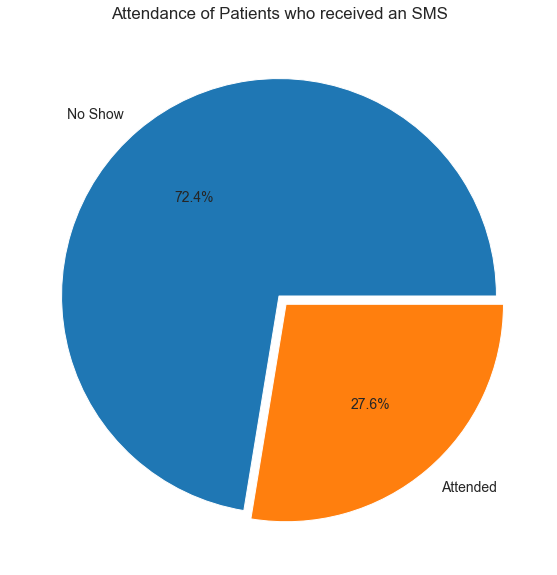

In [233]:
plt.figure(figsize=(20,10))

# Creating autopct arguments
def func(pct, allvalues):
	absolute = int(pct / 100.*np.sum(allvalues))
	return "{:.1f}%".format(pct)

plt.pie(x=plotData_SMSrec,
        labels=['No Show', 'Attended'],
        autopct=lambda pct: func(pct, plotData_SMSrec.values),
        explode=(0.0,0.05))

plt.title("Attendance of Patients who received an SMS");

It looks like there was no improvement in the number of patients who made their appointments. It looks like the SMS reminders didn't help patients meetup their appointments as 72.4% of the patients who received an SMS still didn't show up.

#### Q5: What neighborhood is famous for missing their appointments?

Let's have a look at the list of neighborhoods in this dataset.

In [241]:
df.Neighbourhood.nunique()

80

In [256]:
df.Neighbourhood.value_counts().head(15)

JARDIM CAMBURI       5213
MARIA ORTIZ          3729
RESISTÊNCIA          2814
JARDIM DA PENHA      2652
ITARARÉ              2375
CENTRO               2268
TABUAZEIRO           1922
JESUS DE NAZARETH    1755
BONFIM               1706
CARATOÍRA            1690
JABOUR               1682
SANTA MARTHA         1635
SANTO ANTÔNIO        1619
SANTO ANDRÉ          1607
SÃO PEDRO            1573
Name: Neighbourhood, dtype: int64

There are 80 unique neighbourhoods in this dataset with Jardim Camburi having the most scheduled appointments. Now let's find the attendance level of the each neighborhoods. We'll work with proportions for better comparisons between 

In [281]:
# number of missed appointments for each neighourhood
neighourhood_NoShow = df_miss.Neighbourhood.value_counts() * 100 / df_miss.Neighbourhood.value_counts().sum()

In [297]:
neighourhood_NoShow.head(5)

JARDIM CAMBURI       6.635094
MARIA ORTIZ          5.556098
ITARARÉ              4.232985
RESISTÊNCIA          4.179279
JESUS DE NAZARETH    3.212577
Name: Neighbourhood, dtype: float64

In [291]:
sns.set_style('darkgrid')

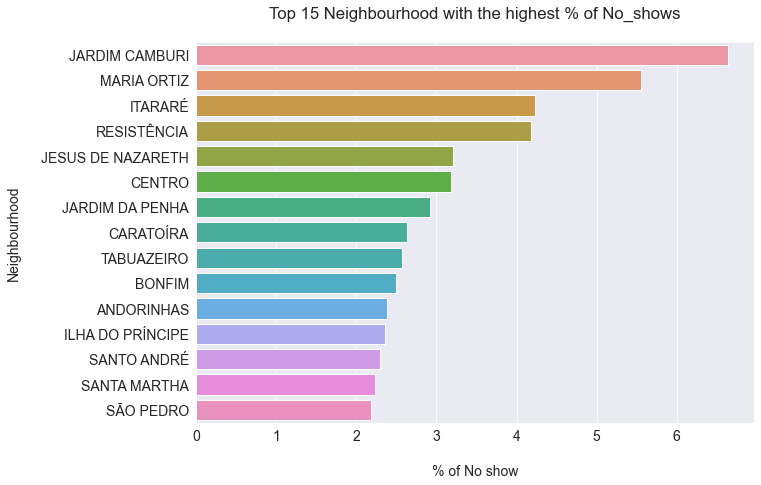

In [296]:
plotData_Hood = neighourhood_NoShow.head(15)

plt.figure(figsize=(10,7))
sns.barplot(x=plotData_Hood.values, y=plotData_Hood.index)
plt.title("Top 15 Neighbourhood with the highest % of No_shows\n")
plt.xlabel("\n% of No show")
plt.ylabel("Neighbourhood\n");

Jardim Camburi is seen to have the highest percentage (6.6%) when compared to the rest of the neighborhoods of no shows to appointments followed by Maria Ortiz which has 5.6% of the total no shows.

## Inferences and Conclusion

From my analysis, I was able to discover that a large number of patients in this dataset didn't have any of the listed ailments and were non alcoholics. Most of the patients most likely paid their medical bills themselves since a large number of them weren't on the Bolsa Família scholarship program. I also noticed that most of the patients in this data were women as women generally take good care of their health than men do. Also while there's a similarity between the number of those who received an SMS and those who didn't, we can see that a majority of the people didn't show up regardless of whether they got an SMS or not.

Let's revisit the questions that were posed earlier on.

**Q1. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?**

From the heatmap of the correlations between all the variables and the target variable (`No_show_numeric`), I noticed that most of our predictor variables had a weak (~0) relationship with the target variable. So far `Scholarship`, `Alcoholism` and `timeToAppointment` had the relatively highest correlation with the target variable, with 0.045, 0.02 and 0.06 respectively.

**Q2. What day of the week to do most people miss their appointment? Consequently, what day do most people show up?**

From my analysis, I found out that Tuesday had the highest percentage (23.0%) of missed appointments followed by Wednesday (22.5%) then Monday (21.5%). This is probably due to the fact that these are the busiest days of the week. Hence people tend to be preoccupied leading to a no-show. Saturday recorded an approximately 0.0% no_show. Only 9 people from this dataset missed their appointments. 

When looking at the days that patients showed the most, I found out that Wednesday had the highest percentage (24.1%) of patients showing up for their appointments. Next was Tuesday with 22.8% then Monday with 19.8%. I noticed that Saturday also had the lowest percentage with only 22 patients showing up in this dataset. 

I was able to infer that the first 3 days of the week are the busiest and also the days that are most likely to get the highest no shows.

**Q3. What is the general age of persons who tend to miss their appointments?**

After exploring this data, I noticed that majority of patients who are no-shows were between the age of 0 to 60 with the mean age being 34.8years while for those who attended their appointments had a peak age of around 53yrs with the mean age being 39.95 yrs. There are no outliers in this variable. 

**Q4. Do SMS reminders affect the average attendance?**

From the data, I didn't see the effect that SMS reminders had on the average attendance. It neither boosted it nor retarded it. Analysis of those who didn't receive an SMS showed that a majority (70.6%) of the patients did not show up and only 29.4% made it for their appointments. From those who received an SMS reminder, 72.4% still didn't show up.

**Q5. What neighborhood is famous for missing their appointments?**
Jardim Camburi was seen to have the highest percentage of no shows (6.6%) when compared to the rest of the neighborhoods of no shows to appointments. They were followed by Maria Ortiz which has 5.6% of the total no shows.


## References and Future Work

* Since most of the variables were binary it nature, I wasn't able to draw insights on how they related to target variable in question (`No_show`).
* The dataset was gotten from [Kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments).